# DATAFRAME PREPARING

In [1]:
import pandas as pd
import numpy as np

In [2]:
# orders_qu.csv (quality controlled)
url = "https://drive.google.com/file/d/17HZn-NY3Ph56-DLPcECTiFxgIOCOfpd6/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv (quality controlled)
url = "https://drive.google.com/file/d/1B6x5XHUjGmOz0gvenuWltPVSOkxqh8dA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv (cleaned)
url = "https://drive.google.com/file/d/1KzLNMAhr6kaSO48iPFRQRr-D9rz_zSAV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1lt9WKBMOCuMqMU66rG9b_q4h0c5PrJmB/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
o = orders_qu.copy()
o.head(1)

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed


In [4]:
ol = orderlines_qu.copy()
ol.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16


In [5]:
b = brands.copy()
b.head(1)

,short,long
0,8MO,8Mobility


In [6]:
## Checking orders
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
o.duplicated().sum()

0

In [8]:
## Converting datatypes
o["created_date"] = pd.to_datetime(o["created_date"])

In [9]:
## Checking orderlines
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [10]:
ol.duplicated().sum()

0

In [11]:
## Converting datatypes
ol["date"] = pd.to_datetime(ol["date"])

## Unique sub_categories

In [12]:
pp_df=products_cl.copy()
pp_df["sub_uni"]=""

In [13]:
pp_df["subcategory"]=""
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9992 non-null   object 
 3   price        9992 non-null   float64
 4   in_stock     9992 non-null   int64  
 5   type         9946 non-null   object 
 6   sub_uni      9992 non-null   object 
 7   subcategory  9992 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 624.6+ KB


In [14]:
## Deleting 46 missing Type values
pp_df=pp_df.loc[~pp_df.type.isna(), :]

In [15]:
pp_df.loc[pp_df['type'].isin(['11865403']),"sub_uni"] = ',phone_case'
pp_df.loc[pp_df['type'].isin(['12175397']),"sub_uni"] = ',server'
pp_df.loc[pp_df['type'].isin(['1298']),"sub_uni"] = ',open'
pp_df.loc[pp_df['type'].isin(['11935397']),"sub_uni"] = ',storage'
pp_df.loc[pp_df['type'].isin(['11905404']),"sub_uni"] = ',iot'
pp_df.loc[pp_df['type'].isin(['1282']),"sub_uni"] = ',computer'
pp_df.loc[pp_df['type'].isin(['12635403']),"sub_uni"] = ',ipad_case'
pp_df.loc[pp_df['type'].isin(['13835403']),"sub_uni"] = ',laptop_case'
pp_df.loc[pp_df['type'].isin(['5,74E+15']),"sub_uni"] = ',imac'
pp_df.loc[pp_df['type'].isin(['1364']),"sub_uni"] = ',RAM'
pp_df.loc[pp_df['type'].isin(['12585395']),"sub_uni"] = ',adapter'
pp_df.loc[pp_df['type'].isin(['1296']),"sub_uni"] = ',monitor'
pp_df.loc[pp_df['type'].isin(['1325']),"sub_uni"] = ',cable'
pp_df.loc[pp_df['sku'].isin(['APP0698',"KAN0052"]),"sub_uni"] = ',cable'
pp_df.loc[pp_df['type'].isin(['5384']),"sub_uni"] = ',headphones'
pp_df.loc[pp_df['type'].isin(['1433']),"sub_uni"] = ',SSD'
pp_df.loc[pp_df['type'].isin(['12215397']),"sub_uni"] = ',SSD_hard_drive'
pp_df.loc[pp_df['type'].isin(['5398']),"sub_uni"] = ',speakers'
pp_df.loc[pp_df['type'].isin(['1,02E+12']),"sub_uni"] = ',macbook_pro'
pp_df.loc[pp_df['type'].isin(['1,44E+11']),"sub_uni"] = ',repair'
pp_df.loc[pp_df['type'].isin(['57445397']),"sub_uni"] = ',memory_card'
pp_df.loc[pp_df['type'].isin(['1334']),"sub_uni"] = ',wifi'
pp_df.loc[pp_df['type'].isin(['2158']),"sub_uni"] = ',touch_bar'
pp_df.loc[pp_df['type'].isin(['2449']),"sub_uni"] = ',smartphone_acc'
pp_df.loc[pp_df['type'].isin(['12655397']),"sub_uni"] = ',hard_drive'
pp_df.loc[pp_df['type'].isin(['1229']),"sub_uni"] = ',pointer'
pp_df.loc[pp_df['type'].isin(['12995397']),"sub_uni"] = ',dock/expander'
pp_df.loc[pp_df['type'].isin(['1515']),"sub_uni"] = ',battery'
pp_df.loc[pp_df['type'].isin(['13615399','5399']),"sub_uni"] = ',charger'
pp_df.loc[pp_df['type'].isin(['13555403']),"sub_uni"] = ',screen_saver'
pp_df.loc[pp_df['type'].isin(['1405']),"sub_uni"] = ',tablet'
pp_df.loc[pp_df['sku'].isin(['APP1978']),"sub_uni"] = ',tablet'
pp_df.loc[pp_df['sku'].isin(['APP2072']),"sub_uni"] = ",Macbook, iMac"
pp_df.loc[(pp_df["desc"].str.lower().str.contains("^.{0,12}watch"))  &  (~pp_df['desc'].str.lower().str.contains('strap'))  &  (~pp_df['desc'].str.lower().str.contains('support'))  &  (~pp_df['desc'].str.lower().str.contains('case')) ,'sub_uni']=',watch'
pp_df.loc[(pp_df['name'].str.lower().str.contains('mouse'))&(~pp_df['name'].str.lower().str.contains('^Apple iMac')),'sub_uni']=',mouse'
pp_df.loc[pp_df['name'].str.lower().str.contains('camera'),'sub_uni']=',camera'
pp_df.loc[pp_df['desc'].str.lower().str.contains('usb cable'),'sub_uni']=',USB cable'
pp_df.loc[(pp_df['desc'].str.lower().str.contains('usb'))&(~pp_df['name'].str.lower().str.contains('cable')),'sub_uni']=',storage'
pp_df.loc[pp_df["desc"].str.lower().str.contains("keyboard"), "sub_uni"] = ",keyboard"
pp_df.loc[pp_df["desc"].str.lower().str.contains("keypad"), "sub_uni"] = ",keypad"
pp_df.loc[pp_df["desc"].str.lower().str.contains("screen saver"), "sub_uni"] = ",screen_saver"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple ipod"), "sub_uni"] = ",ipod"
pp_df.loc[pp_df["type"].isin(["1282", "1,02E+12", "2158", "2,16E+11", "5,74E+15", "5,43E+15", "118692158",]), "sub_uni"] = ",Macbook, iMac"
pp_df.loc[pp_df["type"].str.contains("1716$", regex = True), "sub_uni"] = ",telephony"

#other
pp_df.loc[pp_df["sub_uni"] == "", "sub_uni"] = ",other"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
pp_df.head(5)

,sku,name,desc,price,in_stock,type,sub_uni,subcategory
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,",other",
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,",keyboard",
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,",storage",
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,",USB cable",
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,",RAM",


In [17]:
pp_df['sub_uni'].value_counts()

,other             1367
,storage           1151
,phone_case        1048
,Macbook, iMac      986
,server             922
,open               619
,iot                414
,ipad_case          357
,laptop_case        266
,telephony          221
,RAM                216
,headphones         176
,SSD                171
,monitor            169
,SSD_hard_drive     168
,cable              156
,speakers           153
,repair             117
,smartphone_acc     107
,hard_drive         104
,pointer            103
,wifi               101
,watch               95
,camera              93
,memory_card         87
,screen_saver        87
,keyboard            87
,tablet              73
,charger             62
,USB cable           52
,dock/expander       50
,adapter             48
,ipod                42
,battery             40
,mouse               20
,keypad              18
Name: sub_uni, dtype: int64

## CREATING CATEGORIES

In [18]:
# TYPE       CATEGORY

##### COMPUTERS: Macbook, iMac, desktop
# 1282       Macbook, iMac
# 1,02E+12   Macbook
# 2158       Macbook
# 2,16E+11   iMac
# 5,74E+15   iMac
# 5,43E+15   iMac
# 118692158  iMac


##### TELEPHONY (All the types ending with 1716  )
# 51601716   iPhone
# 85641716   iPhone
# 24811716   iPhone
# 1716       iPhone
# 113281716  iPhone
# 24821716   iPhone
# 113291716  iPhone
# 85651716   iPhone
# 21571716   iPhone


##### AUDIO : headphone, speaker
# 5384       headphone
# 5398       speaker


##### ACCESSORIES : Case/protector, Charger,  Adapter, Cable
## Case/protector (All the types ending with 5403 )
# 11865403   iPhone case/protector
# 12635403   iPad case/protector
# 13835403   Macbook case/bag
# 13555403   screen protector

## Charger (Types ending with 5399  )
# 13615399   charger, charging dock
# 13005399   charger
# 5399       charger

# 1325       adapter, cable



##### STORAGE : Server,memory card, hard disk, hard drive, network storage
# 12175397   server, network storage
# 11935397   storage
# 12215397   storage
# 57445397   memory card, usb flash drive
# 12655397   hard drive, hard disk
# 12995397   
# 1364       Macbook memory



##### TABLETS
# Types ending with 714: iPad


##### OTHERS ?
# 1515       battery
# 1296       monitor
# 1231       AppleCare Protection Plan
# 1433       upgrade/expansion kit
# 1,44E+11   repair service
# 2449       watch band/strap
# 1229       pointer
# 1405       graphical touch tablet 
# 101781405  graphical touch tablet 
# 12585395   usb hub, other adapters
# 11905404   ?
# 1298       ?
# 1334       ?


In [19]:
pp_df.sample(5)

,sku,name,desc,price,in_stock,type,sub_uni,subcategory
6970,OWC0124-A,"Open - OWC HDD Installation Kit for iMac 27 ""2...",installation disc iMac 27-inch HDD in 2012 and...,72.99,0,1298,",open",
2059,APP1007,"Apple MacBook Pro Retina 15 ""i7 25 Ghz | 16GB ...",New MacBook Pro 15-inch Retina screen Core i7 ...,3089.00,0,1282,",Macbook, iMac",
842,BLM0019,Blue Microphones Yeti USB Microphone Black,capsules microphone with three and four differ...,149.00,0,1375,",other",
3013,OTT0104,Clear Case OtterBox Symmetry iPhone 6 / 6S Plu...,Protective housing with rear transparent and c...,34.99,0,11865403,",phone_case",
3267,PAC1297,Pack QNAP TS-251 + | 8GB RAM | WD 8TB Network,Pack QNAP TS-251 + 8 + 8 TB GB RAM memory (2x4...,837.99,0,12175397,",server",


In [20]:
pp_df.loc[pp_df['type'].isin(['11865403']),"subcategory"] += ',phone_case'
pp_df.loc[pp_df['type'].isin(['12175397']),"subcategory"] += ',server'
pp_df.loc[pp_df['type'].isin(['1298']),"subcategory"] += ',open'
pp_df.loc[pp_df['type'].isin(['11935397']),"subcategory"] += ',storage'
pp_df.loc[pp_df['type'].isin(['11905404']),"subcategory"] += ',iot'
pp_df.loc[pp_df['type'].isin(['1282']),"subcategory"] += ',computer'
pp_df.loc[pp_df['type'].isin(['12635403']),"subcategory"] += ',ipad_case'
pp_df.loc[pp_df['type'].isin(['13835403']),"subcategory"] += ',laptop_case'
pp_df.loc[pp_df['type'].isin(['5,74E+15']),"subcategory"] += ',imac'
pp_df.loc[pp_df['type'].isin(['1364']),"subcategory"] += ',RAM'
pp_df.loc[pp_df['type'].isin(['12585395']),"subcategory"] += ',adapter'
pp_df.loc[pp_df['type'].isin(['1296']),"subcategory"] += ',monitor'
pp_df.loc[pp_df['type'].isin(['1325']),"subcategory"] += ',cable'
pp_df.loc[pp_df['type'].isin(['5384']),"subcategory"] += ',headphones'
pp_df.loc[pp_df['type'].isin(['1433']),"subcategory"] += ',SSD'
pp_df.loc[pp_df['type'].isin(['12215397']),"subcategory"] += ',SSD_hard_drive'
pp_df.loc[pp_df['type'].isin(['5398']),"subcategory"] += ',speakers'
pp_df.loc[pp_df['type'].isin(['1,02E+12']),"subcategory"] += ',macbook_pro'
pp_df.loc[pp_df['type'].isin(['1,44E+11']),"subcategory"] += ',repair'
pp_df.loc[pp_df['type'].isin(['57445397']),"subcategory"] += ',memory card'
pp_df.loc[pp_df['type'].isin(['1334']),"subcategory"] += ',wifi'
pp_df.loc[pp_df['type'].isin(['2158']),"subcategory"] += ',touch_bar'
pp_df.loc[pp_df['type'].isin(['2449']),"subcategory"] += ',smartphone_acc'
pp_df.loc[pp_df['type'].isin(['12655397']),"subcategory"] += ',hard_drive'
pp_df.loc[pp_df['type'].isin(['1229']),"subcategory"] += ',pointers'
pp_df.loc[pp_df['type'].isin(['12995397']),"subcategory"] += ',dock/expander'
pp_df.loc[pp_df['type'].isin(['1515']),"subcategory"] += ',battery'
pp_df.loc[pp_df['type'].isin(['13615399']),"subcategory"] += ',charger'
pp_df.loc[pp_df['type'].isin(['5399']),"subcategory"] += ',charger'
pp_df.loc[pp_df['type'].isin(['13555403']),"subcategory"] += ',screen_savers'
pp_df.loc[pp_df['type'].isin(['1405']),"subcategory"] += ',tablet'

In [21]:
## Just added 2 extra lines here(with regex ones), since all types ending with 1716 are iphone and all types ending with 704 are ipad

In [22]:
pp_df.loc[pp_df["desc"].str.lower().str.contains("keyboard"), "subcategory"] += ",keyboard"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple iphone"), "subcategory"] += ",iphone"
pp_df.loc[pp_df["type"].str.contains("1716$", regex = True), "subcategory"] = ",iphone"
pp_df.loc[pp_df["type"].str.contains("704$", regex = True), "subcategory"] = ",tablet"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple ipod"), "subcategory"] += ",ipod"
pp_df.loc[pp_df["name"].str.lower().str.contains("^.{0,7}apple ipad|tablet"), "subcategory"] += ",tablet"
pp_df.loc[pp_df["name"].str.lower().str.contains("imac|mac mini|mac pro"), "subcategory"] += ",desktop"

In [23]:
pp_df.loc[(pp_df['name'].str.lower().str.contains('backpack'))|(pp_df['desc'].str.lower().str.contains('backpack')),'subcategory']+=',backpack'
pp_df.loc[(pp_df["desc"].str.lower().str.contains("^.{0,12}apple watch"))&(~pp_df['desc'].str.lower().str.contains('support')),'subcategory']+=',smartwatch'
pp_df.loc[(pp_df['name'].str.lower().str.contains('mouse'))&(~pp_df['name'].str.lower().str.contains('^Apple iMac')),'subcategory']+=',mouse'
pp_df.loc[pp_df['name'].str.lower().str.contains('drone'),'subcategory']+=',drone'
pp_df.loc[pp_df['name'].str.lower().str.contains('camera'),'subcategory']+=',camera'

In [24]:
 #accessory cats
 pp_df.loc[pp_df['desc'].str.lower().str.contains('refurbished'),'subcategory']+=',refurbished'
 pp_df.loc[pp_df['desc'].str.lower().str.contains('repair'),'subcategory']+=',repair'
 pp_df.loc[pp_df['name'].str.lower().str.contains('open -'),'subcategory']+=',like_new'

In [25]:
 #other
 pp_df.loc[pp_df['subcategory']=='','subcategory'] += ',other'

In [26]:
pp_df['subcategory'].value_counts()

,other                         1019
,server                         928
,phone_case                     900
,storage                        520
,open,like_new                  475
                               ... 
,open,mouse,like_new              1
,cable,refurbished,like_new       1
,open,mouse                       1
,speakers,tablet                  1
,open,repair                      1
Name: subcategory, Length: 163, dtype: int64

In [27]:
##deleting commas
pp_df["subcategory"] = pp_df["subcategory"].str[1:]
pp_df["sub_uni"] = pp_df["sub_uni"].str[1:]

In [28]:
# creating new category column
# and here our main category column
pp_df["category"] = ""

In [29]:
## filling category column
## COMPUTERS: Macbook, iMac, desktop | TELEPHONY: iPhone, smartphone | AUDIO : headphone, speaker | ACCESSORIES: Case/protector, Charger, Adapter, Cable
## STORAGE: Server, memory card, hard disk, hard drive, network storage

pp_df.loc[pp_df['sub_uni'].isin(['telephony']),'category']='telephony'
pp_df.loc[pp_df['sub_uni'].isin(['Macbook, iMac']),'category']='computer'
pp_df.loc[pp_df['sub_uni'].isin(['headphones','speakers','ipod']),'category']='audio'
pp_df.loc[pp_df['sub_uni'].isin(['computer','monitor','iot',',phone_case','ipad_case','laptop_case','smartphone_acc','screen_saver','camera','charger','adapter','keypad','cable','USB cable','wifi','touch_bar','pointer','dock/expander','battery','screen_saver','keyboard','mouse']),'category']='accessories'
pp_df.loc[pp_df['sub_uni'].isin(['tablet','watch']),'category']='tablets & watches'
pp_df.loc[pp_df['sub_uni'].isin(['server','storage','SSD_hard_drive','memory_card','hard_drive','RAM','SSD']),'category']='storage & memory'

# other
pp_df.loc[pp_df["category"]=="","category"]="other"

pp_df.sample(20)

,sku,name,desc,price,in_stock,type,sub_uni,subcategory,category
6307,WDT0331-A,Open - WD My Passport Ultra Hard Drive 4TB Mac...,external hard drive with 4TB capacity and USB ...,189.99,0,1298,storage,"open,like_new",storage & memory
6780,SXA0020,SecurityXtra Akimbo iPad Support Black,robust support with viewing angle of 30 degree...,49.99,0,1216,other,other,other
7561,APP2240,"Apple iMac 21.5 ""Core i7 4K Retina 36GHz | 16G...",PC 215 inch iMac RAM 16GB 1TB Fusion,2179.00,0,"2,16E+11","Macbook, iMac",desktop,computer
3478,APP1217,"Apple iPad Smart Cover Case Pro 129 ""Charcoal ...",Smart cover with different positions for iPad ...,69.00,0,12635403,ipad_case,"ipad_case,tablet",accessories
5504,BEA0062,Solo3 Beats Headphones Wireless On-Ear White S...,Bluetooth helmets (wireless) integrated chip W...,299.95,0,5384,headphones,headphones,audio
4021,APP1525,"Apple iPad Smart Cover Pro 97 ""Menta",Smart sleeve with different positions for case...,59.00,0,12635403,ipad_case,"ipad_case,tablet",accessories
9935,ZAG0041,Zagg iPhone Glass Screen Protector + 8 Plus / ...,impact and scratch resistant tempered glass fo...,29.99,1,13555403,screen_saver,screen_savers,accessories
2927,PAC1160,Synology Pack DS216SE | Seagate 6TB IronWolf,Pack + Synology 6TB (2x3TB) Seagate Hard Drive...,419.97,1,12175397,server,server,storage & memory
3862,PAC1739,QNAP TS-128 Server l Nas 8TB (1x8TB) WD Red,NAS TS-128 1 8TB hard drive for Mac and PC,477.99,0,12175397,server,server,storage & memory
1242,PAC1823,Synology DS1515 + l l 8GB RAM 50TB (5x10TB) Se...,Synology DS1815 + NAS with 8GB RAM and 50TB ha...,3885.92,0,12175397,server,server,storage & memory


In [30]:
pp_df.category.value_counts()

other                3151
storage & memory     2819
accessories          2230
computer              986
audio                 371
telephony             221
tablets & watches     168
Name: category, dtype: int64

## CREATING COMPREHENSIVE DATAFRAME

In [31]:
## merging orderlines, orders, products table
df = pd.merge(ol,o, how="inner", left_on="id_order" , right_on="order_id").merge(pp_df, how="inner", on="sku")

In [32]:
df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,state,name,desc,price,in_stock,type,sub_uni,subcategory,category
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,299545,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,other,desktop,other


In [33]:
## Creating brand "short" column
df["short"] = df["sku"].str[:3]

In [34]:
## Merging brands table
df = pd.merge(df, brands, how="inner", on="short")
df.sample(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,order_id,created_date,total_paid,...,name,desc,price,in_stock,type,sub_uni,subcategory,category,short,long
46947,1232637,348414,0,1,JAW0048,29.99,2017-04-21 14:37:01,348414,2017-04-21 14:41:37,33.98,...,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,iot,iot,accessories,JAW,Jawbone


In [35]:
## Creating new unit_price_total column (revenue)
df["revenue"] = df.unit_price * df.product_quantity

In [36]:
## Creating new discount column = price-unitprice
df["discount"] = (df.price - df.unit_price)

In [37]:
## Creating new discount_rate column
df['discount_rate'] = (df.discount / df.price * 100)

In [38]:
## Renaming columns
df = df.rename(columns={'product_quantity': 'quantity'})
df = df.rename(columns={'long': 'brand'})

In [39]:
## using round()
df["price"] = df["price"].round()
df["unit_price"] = df["unit_price"].round()
df["revenue"] = df["revenue"].round()
df["discount"] = df["discount"].round()
df["discount_rate"] = df["discount_rate"].round()

In [40]:
df.head()

,id,id_order,product_id,quantity,sku,unit_price,date,order_id,created_date,total_paid,...,in_stock,type,sub_uni,subcategory,category,short,brand,revenue,discount,discount_rate
0,1119116,299545,0,1,OWC0100,47.0,2017-01-01 01:46:16,299545,2017-01-01 01:51:47,51.48,...,1,12755395,other,desktop,other,OWC,OWC,47.0,14.0,22.0
1,1120182,299404,0,1,OWC0100,47.0,2017-01-01 22:50:39,299404,2017-01-01 22:59:31,415.11,...,1,12755395,other,desktop,other,OWC,OWC,47.0,14.0,22.0
2,1121550,300650,0,1,OWC0100,50.0,2017-01-02 15:31:09,300650,2017-01-02 15:41:52,49.99,...,1,12755395,other,desktop,other,OWC,OWC,50.0,11.0,18.0
3,1121801,300760,0,1,OWC0100,50.0,2017-01-02 17:20:31,300760,2017-01-02 17:21:49,73.97,...,1,12755395,other,desktop,other,OWC,OWC,50.0,11.0,18.0
4,1124334,301975,0,1,OWC0100,50.0,2017-01-03 20:04:54,301975,2017-01-05 10:55:26,315.95,...,1,12755395,other,desktop,other,OWC,OWC,50.0,11.0,18.0


In [41]:
df['discount_range']=""

In [42]:
df.loc[df['discount_rate']<=0,"discount_range"] = 'no'
df.loc[df['discount_rate']>0,"discount_range"] = '0-5%'
df.loc[df['discount_rate']>5,"discount_range"] = '10-20%'
df.loc[df['discount_rate']>20,"discount_range"] = '20-30%'
df.loc[df['discount_rate']>30,"discount_range"] = '30-40%'
df.loc[df['discount_rate']>40,"discount_range"] = '40-50%'
df.loc[df['discount_rate']>50,"discount_range"] = 'over 50%'

In [43]:
## Deleting unnecessary columns
df.drop("created_date", axis=1, inplace=True)
df.drop("id_order", axis=1, inplace=True)
df.drop("product_id", axis=1, inplace=True)
df.drop("state", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.drop("short", axis=1, inplace=True)
df.drop("in_stock", axis=1, inplace=True)
df.drop("order_id", axis=1, inplace=True)
df.drop("desc", axis=1, inplace=True)
df.drop("total_paid", axis=1, inplace=True)
df.drop("subcategory", axis=1, inplace=True)
df.drop("type", axis=1, inplace=True)

In [44]:
## Renaming columns
df = df.rename(columns={'sub_uni': 'subcategory'})

In [45]:
df.head(1)

,quantity,sku,unit_price,date,name,price,subcategory,category,brand,revenue,discount,discount_rate,discount_range
0,1,OWC0100,47.0,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,61.0,other,other,OWC,47.0,14.0,22.0,20-30%


# VISUALIZATIONS

In [46]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## NOTES

***NOTES:*** ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️
- plt.title(title, fontsize=10)  > adds Title**
- plt.xlabel(name, fontsize=10)  > adds label name to x axis
- plt.ylabel(name, fontsize=10)  > adds label name to y axis
- plt.xticks([0, 10, 20...]);  >  adds ranges to x axis
- plt.yticks([0, 10, 20...]);  >  adds ranges to y axis
- plt.figure(figsize=(8,8)) > edits size columns and raws

In [47]:
category_df1 = df.groupby("category", as_index=False).agg({"quantity" : "sum", "price" : "mean", "discount" : "mean", "revenue" :"mean", "sku": "count"}).round().sort_values(by="quantity", ascending=False)


In [48]:
category_df1

,category,quantity,price,discount,revenue,sku
4,storage & memory,20743,185.0,28.0,177.0,17478
3,other,15812,89.0,18.0,74.0,14827
0,accessories,15426,103.0,21.0,91.0,13450
1,audio,3439,157.0,33.0,132.0,3119
6,telephony,2323,619.0,50.0,586.0,2263
5,tablets & watches,1951,283.0,38.0,258.0,1797
2,computer,262,1014.0,242.0,808.0,250


## BAR PLOT 1 (barplot / catplot)

Text(0, 0.5, 'Product quantity')

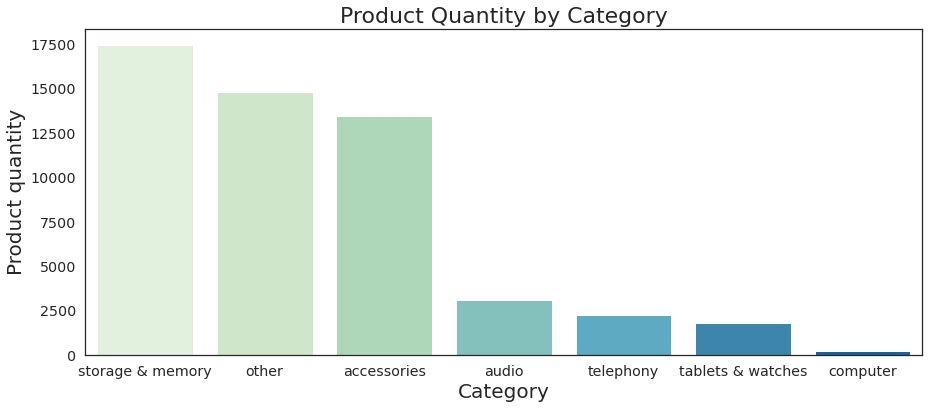

In [49]:
plt.figure(figsize=(15,6))

sns.set(font_scale=1.3)
sns.set_style("white")

sns.barplot(data=category_df1,
            x="category",
            y="sku",
            palette="GnBu");


plt.title("Product Quantity by Category", fontsize=22)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Product quantity', fontsize=20)

♥️♥️♥️♥️♥️♥️ OR ♥️♥️♥️♥️♥️♥️
barplot()

Text(-10.026999999999994, 0.5, 'Product quantity')

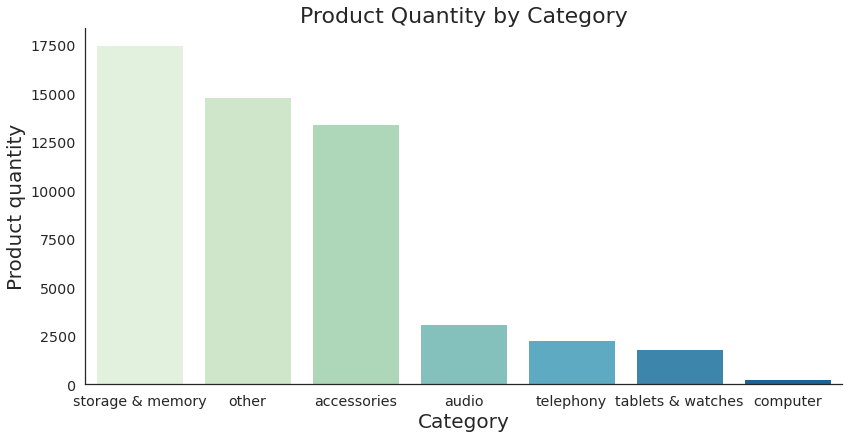

In [50]:
sns.set(font_scale=1.3)
sns.set_style("white")

sns.catplot(kind="bar",
            data=category_df1,
            x="category",
            y="sku",
            height=6,
            aspect=2,
            palette="GnBu");


plt.title("Product Quantity by Category", fontsize=22)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Product quantity', fontsize=20)

## BAR PLOT 2 (countplot / catplot)

Text(0, 0.5, 'Product quantity')

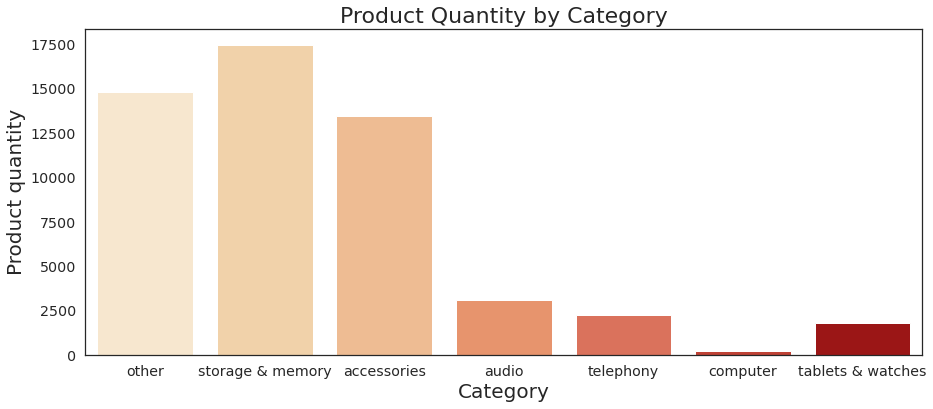

In [51]:
plt.figure(figsize=(15,6))

sns.countplot(data=df,
              x="category",
              palette="OrRd")

plt.title("Product Quantity by Category", fontsize=22)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Product quantity', fontsize=20)

♥️♥️♥️♥️♥️♥️ **OR** ♥️♥️♥️♥️♥️♥️

Text(-10.026999999999994, 0.5, 'Product quantity')

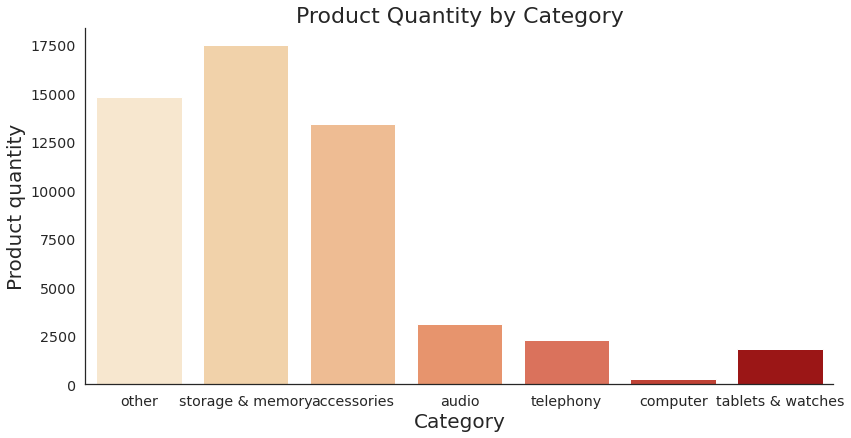

In [52]:
sns.set(font_scale=1.3)
sns.set_style("white")

sns.catplot(kind="count",
            data=df,
              x="category",
              palette="OrRd",
             height=6,
            aspect=2,)

plt.title("Product Quantity by Category", fontsize=22)
plt.xlabel('Category', fontsize=20)
plt.ylabel('Product quantity', fontsize=20)

In [53]:
df.head(1)

,quantity,sku,unit_price,date,name,price,subcategory,category,brand,revenue,discount,discount_rate,discount_range
0,1,OWC0100,47.0,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,61.0,other,other,OWC,47.0,14.0,22.0,20-30%


## BAR PLOT 3 - Grouped (countplot)

Text(0, 0.5, 'Product quantity')

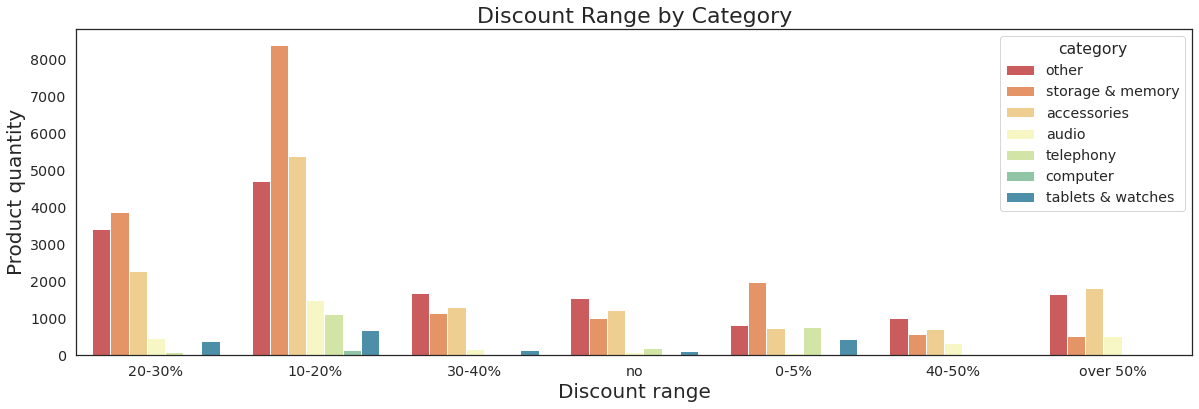

In [54]:
plt.figure(figsize=(20,6))

sns.countplot(data=df,
              x="discount_range",
              palette="Spectral",
              hue="category")

plt.title("Discount Range by Category", fontsize=22)
plt.xlabel('Discount range', fontsize=20)
plt.ylabel('Product quantity', fontsize=20)


In [55]:
df["unit_price category"] = np.where(df["unit_price"] <= 100, "0-100",
                       np.where(df["unit_price"] <= 200.0, "100-200",
                       np.where(df["unit_price"] <= 300.0, "200-300",
                       np.where(df["unit_price"] <= 400.0, "300-400",
                       np.where(df["unit_price"] <= 500.0, "400-500",
                       np.where(df["unit_price"] <= 600.0, "500-600",
                       np.where(df["unit_price"] <= 700.0, "600-700", "> 700")))))))

In [56]:
unitprice_df1 = df.sort_values(by="unit_price")
unitprice_df1.groupby("category").agg({"unit_price" : "mean", "revenue" : "sum", "quantity" : "sum"}).sort_values(by="unit_price", ascending=False)

,unit_price,revenue,quantity
category,,,
computer,771.332000,202021.0,262
telephony,568.965974,1325386.0,2323
tablets & watches,244.750696,463800.0,1951
storage & memory,157.132109,3091128.0,20743
audio,123.898685,411036.0,3439
accessories,81.570706,1218237.0,15426
other,70.907196,1094214.0,15812


## BAR PLOT 3 (displot)

Text(5.126478031517095, 0.5, 'product quantity')

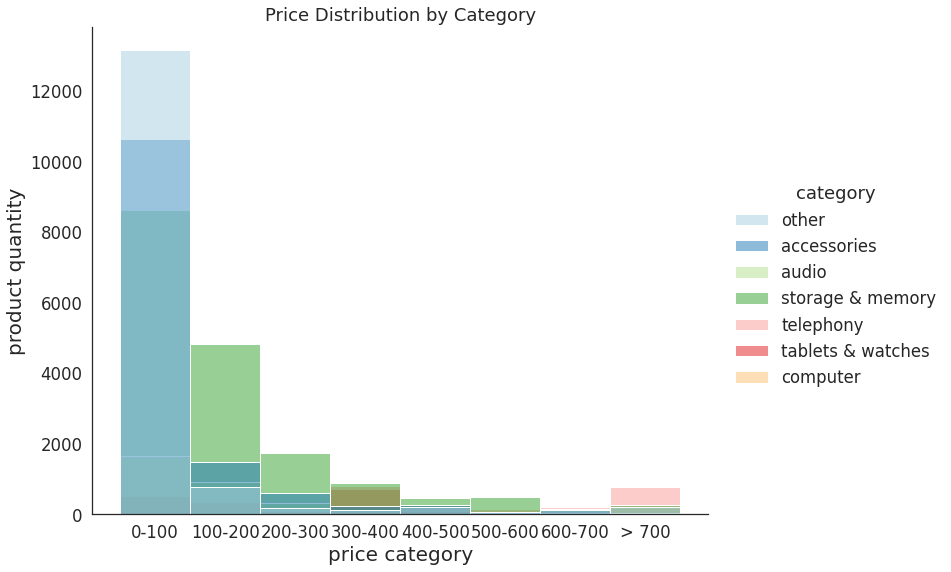

In [57]:
sns.set(font_scale=1.5)
sns.set_style("white")

sns.displot(data=unitprice_df1,
            x="unit_price category",
            hue="category",
            height=8,
            aspect=1.3,
            palette= "Paired").set(title="Price Distribution by Category");

plt.xlabel('price category', fontsize=20)
plt.ylabel('product quantity', fontsize=20)

In [58]:
## Creating new year,month columns
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month_name()
df["day"] = df["date"].dt.day
df["month_year"] = df["date"].dt.strftime("%B %Y")

In [59]:
# converting date types, in order to see sorted ascending in thhe graph
df["month_year"] = pd.to_datetime(df["month_year"])

In [60]:
year_df = df.groupby(["month_year"]).agg({"quantity":"sum", "discount":"mean", "discount_rate":"mean", "revenue":"sum"}).round()
year_df

,quantity,discount,discount_rate,revenue
month_year,,,,
2017-01-01,6846,22.0,25.0,606440.0
2017-02-01,2913,21.0,20.0,326344.0
2017-03-01,246,16.0,19.0,25509.0
2017-04-01,2128,18.0,18.0,230115.0
2017-05-01,2572,20.0,15.0,330862.0
2017-06-01,2050,25.0,17.0,284240.0
2017-07-01,4620,30.0,25.0,601693.0
2017-08-01,3022,28.0,21.0,376196.0
2017-09-01,2788,26.0,20.0,393190.0


## LINE PLOT 1 (replot)

Text(-10.684999999999995, 0.5, 'quantity')

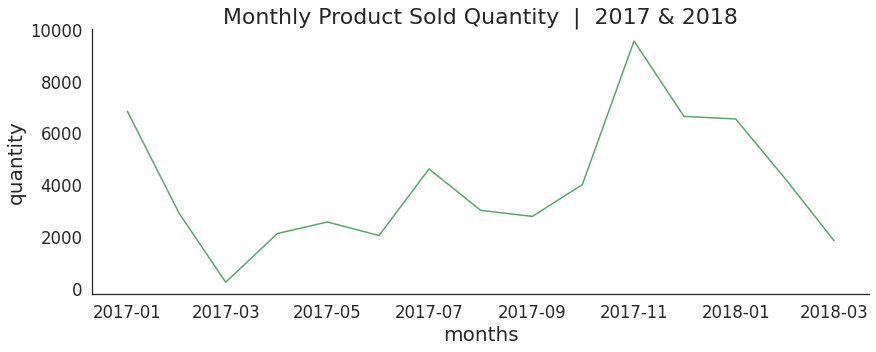

In [61]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="quantity",
            height=5,
            aspect=2.5,
            color="g"));
            
plt.title("Monthly Product Sold Quantity  |  2017 & 2018", fontsize=22)
plt.xlabel('months', fontsize=20)
plt.ylabel('quantity', fontsize=20)

Text(20.690000000000005, 0.5, 'discount_rate')

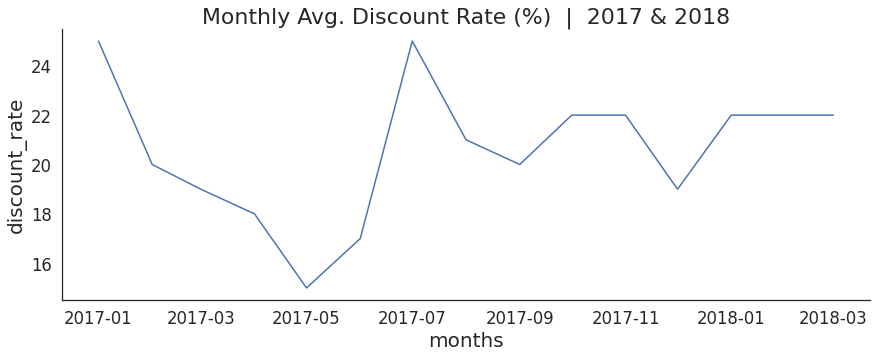

In [62]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="discount_rate",
            height=5,
            aspect=2.5,
            color="b").set(title="Monthly Avg. Discount Rate (%)  |  2017 & 2018"));

plt.title("Monthly Avg. Discount Rate (%)  |  2017 & 2018", fontsize=22)
plt.xlabel('months', fontsize=20)
plt.ylabel('discount_rate', fontsize=20)

Text(4.940000000000005, 0.5, 'revenue')

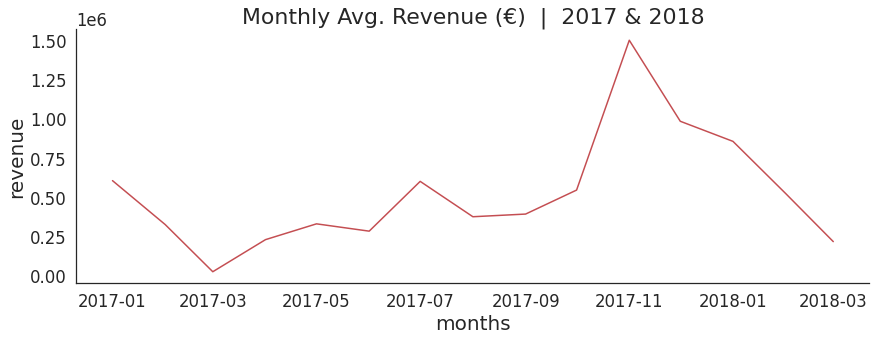

In [63]:
sns.set(font_scale=1.5)
sns.set_style("white")

(
sns.relplot(kind="line",
            data=year_df,
            x="month_year",
            y="revenue",
            height=5,
            aspect=2.5,
            color="r").set(title="Monthly Avg. Revenue (€)  |  2017 & 2018"));

plt.title("Monthly Avg. Revenue (€)  |  2017 & 2018", fontsize=22)
plt.xlabel('months', fontsize=20)
plt.ylabel('revenue', fontsize=20)

In [64]:
df.head(1)

,quantity,sku,unit_price,date,name,price,subcategory,category,brand,revenue,discount,discount_rate,discount_range,unit_price category,year,month,day,month_year
0,1,OWC0100,47.0,2017-01-01 01:46:16,OWC In-line Digital Temperature Sensor Kit HDD...,61.0,other,other,OWC,47.0,14.0,22.0,20-30%,0-100,2017,January,1,2017-01-01


In [65]:
year_df2 = df.groupby("month_year").agg({"unit_price" : "mean" , "price" : "mean"  }).round()
year_df2

,unit_price,price
month_year,,
2017-01-01,94.0,115.0
2017-02-01,117.0,138.0
2017-03-01,104.0,120.0
2017-04-01,112.0,130.0
2017-05-01,134.0,154.0
2017-06-01,147.0,172.0
2017-07-01,136.0,166.0
2017-08-01,129.0,157.0
2017-09-01,146.0,172.0


## LINE PLOT 2 (lineplot)

Text(0, 0.5, 'Unit price')

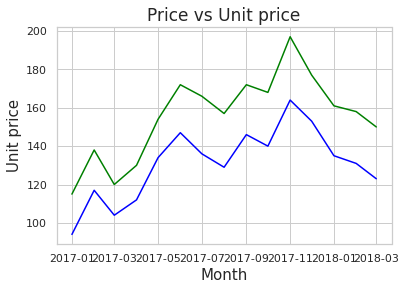

In [66]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

sns.lineplot(data=year_df2,
             x="month_year",
             y="unit_price",
             color="blue")

sns.lineplot(data=year_df2,
             x="month_year",
             y="price",
             color="green")



plt.title("Price vs Unit price", fontsize=17)
plt.xlabel ("Month", fontsize=15)
plt.ylabel ("Unit price", fontsize=15)

**ADDING MARKER:**

Text(0, 0.5, 'Unit price')

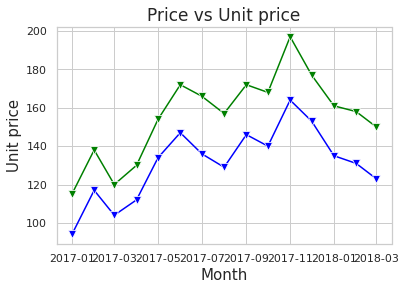

In [67]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

l1 = sns.lineplot(data=year_df2,
             x="month_year",
             y="unit_price",
             color="blue",
             marker= 'v', markersize=8)

l2 = sns.lineplot(data=year_df2,
             x="month_year",
             y="price",
             color="green",
             marker= 'v', markersize=8)



l1.set_title("Price vs Unit price", fontsize=17)
l1.set_xlabel ("Month", fontsize=15)
l1.set_ylabel ("Unit price", fontsize=15)

In [68]:
discount_revenue_df = df[df["discount"] > 0]

## SCATTER PLOT 1 (replot)

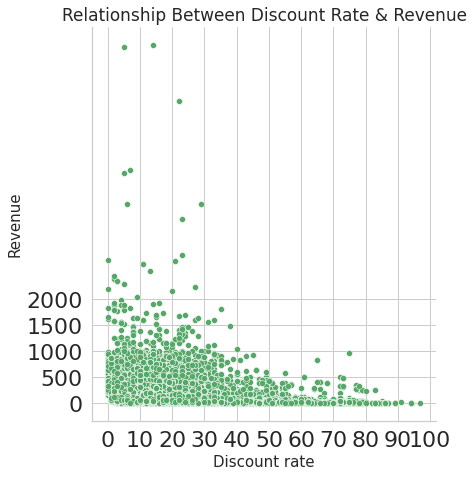

In [69]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

sns.relplot(data=discount_revenue_df,
           x="discount_rate",
           y="revenue",
           height=7,
           aspect=1,
           color="g");


plt.title("Relationship Between Discount Rate & Revenue", fontsize=17)
plt.xlabel ("Discount rate", fontsize=15)
plt.ylabel ("Revenue", fontsize=15)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
plt.yticks([0, 500, 1000, 1500, 2000]);

## SCATTER PLOT 2 (replot)

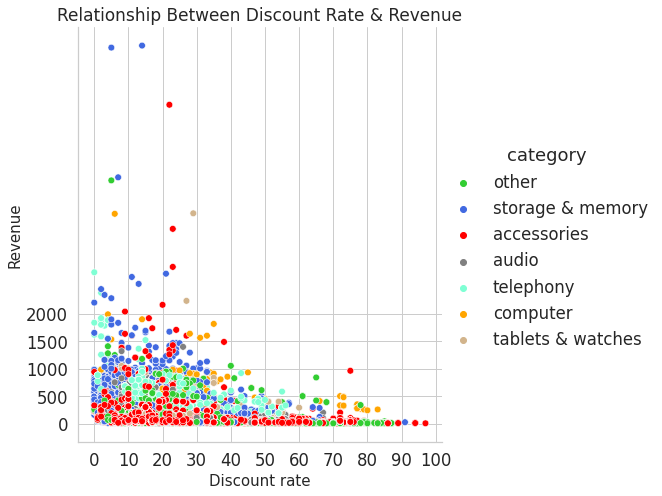

In [70]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
color = ["limegreen", "royalblue", "red", "gray", "aquamarine", "orange", "tan"]

sns.relplot(data=discount_revenue_df,
           x="discount_rate",
           y="revenue",
           height=7,
           aspect=1,
            hue="category",
            s=45,
           palette=color);

plt.title("Relationship Between Discount Rate & Revenue", fontsize=17)
plt.xlabel ("Discount rate", fontsize=15)
plt.ylabel ("Revenue", fontsize=15)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);
plt.yticks([0, 500, 1000, 1500, 2000]);

## SCATTER PLOT 3 (ggplot & replot)

**Regression Plot**

Text(0, 0.5, 'Revenue')

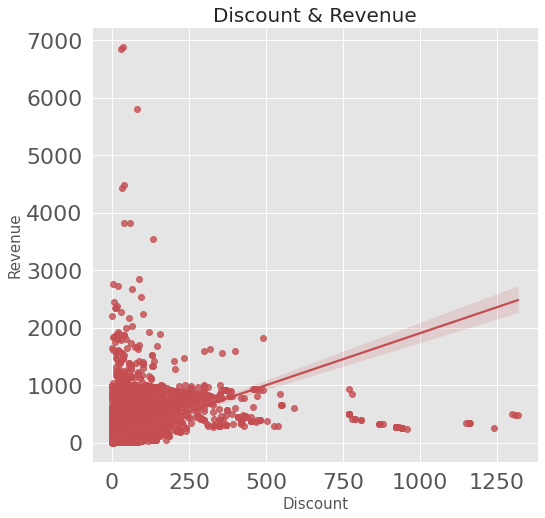

In [71]:
sns.set(font_scale=2)
sns.set_style("whitegrid")

plt.style.use("ggplot")
plt.figure(figsize=(8,8))


sns.regplot(data=discount_revenue_df,
           x="discount",
           y="revenue",
            color="r")


plt.title("Discount & Revenue", fontsize=20)
plt.xlabel ("Discount", fontsize=15)
plt.ylabel ("Revenue", fontsize=15)

## HISTOGRAM (distplot)

Text(0, 0.5, 'Density')

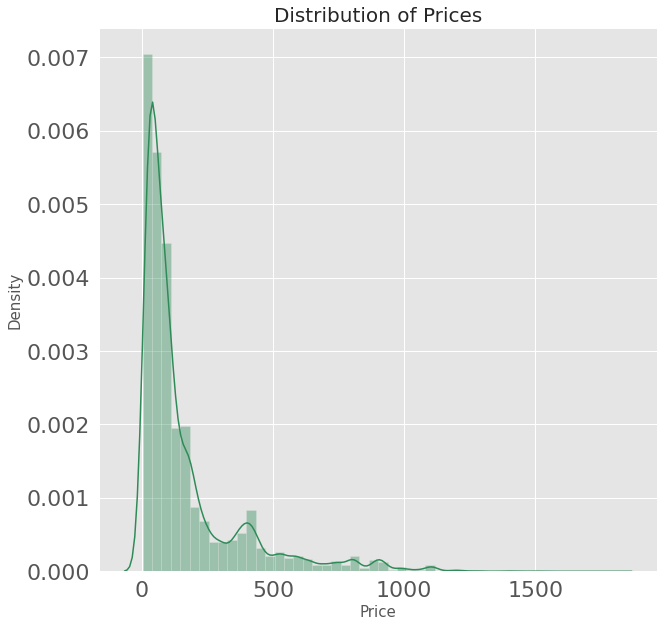

In [72]:
plt.figure(figsize=(10,10))

sns.distplot(df['price'],
             color='seagreen',
             kde=True)

plt.title("Distribution of Prices", fontsize=20)
plt.xlabel ("Price", fontsize=15)
plt.ylabel ("Density", fontsize=15)

## BOX AND WHISKERS PLOT (boxplot)

Text(0, 0.5, 'Price')

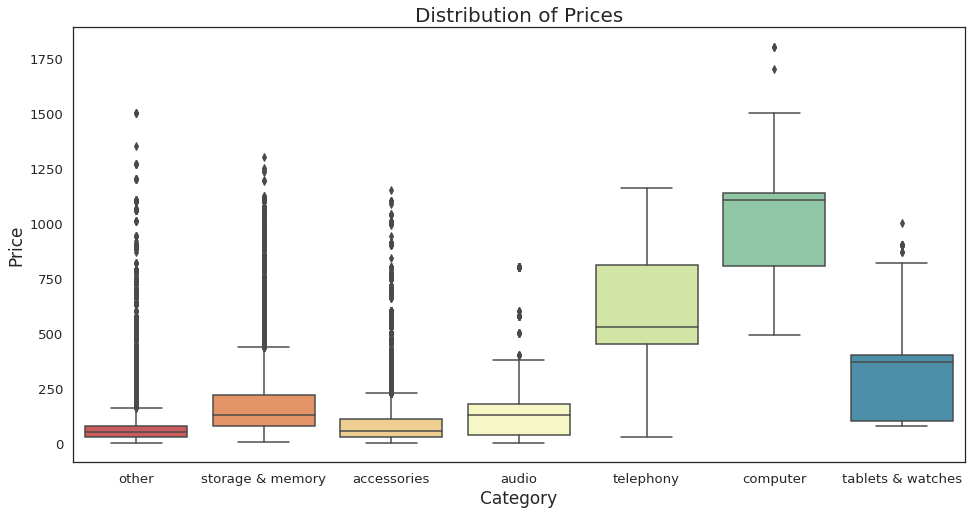

In [73]:
plt.figure(figsize=(16,8))

sns.set(font_scale=1.2)
sns.set_style("white")

sns.boxplot(data=df,
            x="category", 
            y="price",
            palette="Spectral")



plt.title("Distribution of Prices", fontsize=20)
plt.xlabel ("Category", fontsize=17)
plt.ylabel ("Price", fontsize=17)

## VIOLIN PLOT (violinplot)

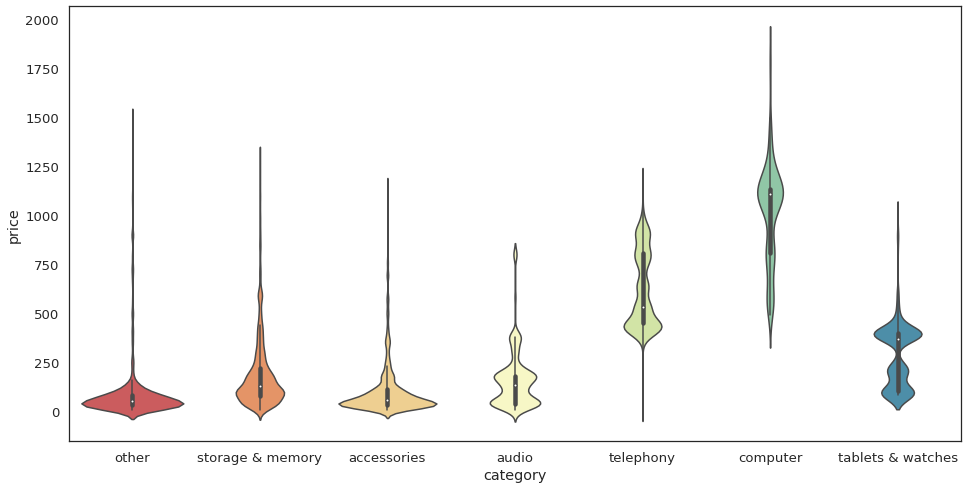

In [74]:
plt.figure(figsize=(16,8))

sns.set(font_scale=1.2)
sns.set_style("white")

sns.violinplot(data = df,
               x= 'category',
               y="price",
               palette="Spectral")

## PIE CHART

Text(0.5, 1.0, '% Product Quantity')

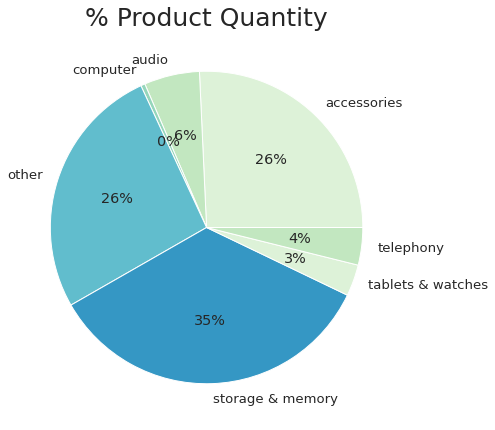

In [97]:
plt.figure(figsize=(7,8))
sns.set(font_scale=1.2)

#define data
data = [15426, 3439, 262, 15812, 20743, 1951, 2323]
labels = ['accessories', 'audio', 'computer', 'other', 'storage & memory','tablets & watches','telephony']

#define Seaborn color palette to use
colors = sns.color_palette('GnBu')[0:5]

#create pie chart
plt.pie(data,
        labels = labels,
        colors = colors,
        autopct='%.0f%%')

plt.title("% Product Quantity", fontsize=25)

In [78]:
category_df1

,category,quantity,price,discount,revenue,sku
4,storage & memory,20743,185.0,28.0,177.0,17478
3,other,15812,89.0,18.0,74.0,14827
0,accessories,15426,103.0,21.0,91.0,13450
1,audio,3439,157.0,33.0,132.0,3119
6,telephony,2323,619.0,50.0,586.0,2263
5,tablets & watches,1951,283.0,38.0,258.0,1797
2,computer,262,1014.0,242.0,808.0,250


Text(0.5, 1.0, 'Pie Chart')

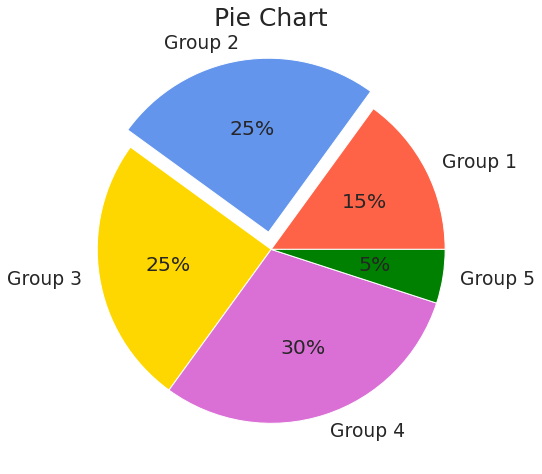

In [86]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.7)

#define data
data = [15, 25, 25, 30, 5]
keys = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

  
# declare exploding pie
explode_det = [0, 0.1, 0, 0, 0]

# define Seaborn color palette to use
color = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green', 'gray', 'red']

  
# plotting data on chart
plt.pie(data,
        labels=keys,
        colors=color,
        explode=explode_det,
        autopct='%.0f%%')
  

plt.title("Pie Chart", fontsize=25)

## DONUT CHART

Text(0.5, 1.0, 'Donut Chart')

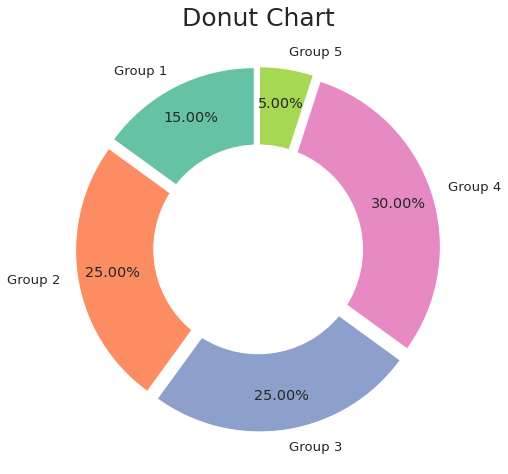

In [88]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)

#define data
data = [15, 25, 25, 30, 5]
keys = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']


# declare exploding pie
explode_det = [0.05, 0.05, 0.05, 0.05, 0.05]

# define Seaborn color palette to use
color = sns.color_palette('Set2')[0:5]
  
# plotting data on chart
plt.pie(data,
        labels=keys,
        colors=color,
        explode=explode_det,
        startangle=90,
        autopct='%1.2f%%',
        pctdistance=0.80)
  
  
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)


plt.title("Donut Chart", fontsize=25)

Text(0.5, 1.0, '% Product Quantity')

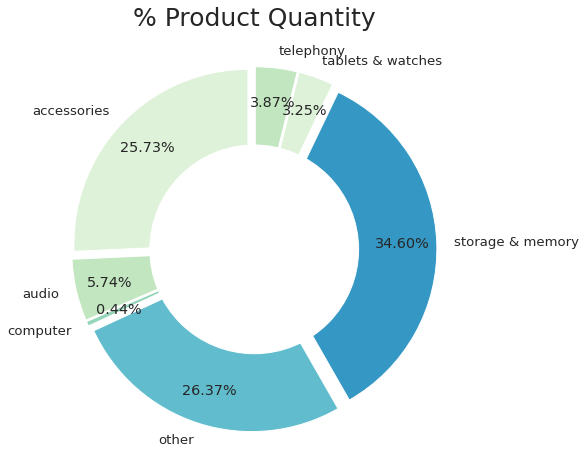

In [107]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)

#define data
data = [15426, 3439, 262, 15812, 20743, 1951, 2323]
keys = ['accessories', 'audio', 'computer', 'other', 'storage & memory','tablets & watches','telephony']


# declare exploding pie
explode_det = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

# define Seaborn color palette to use
color = sns.color_palette('GnBu')[0:5]
  
# plotting data on chart
plt.pie(data,
        labels=keys,
        colors=color,
        explode=explode_det,
        startangle=90,
        autopct='%1.2f%%',
        pctdistance=0.80)
  
  
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)


plt.title("% Product Quantity", fontsize=25)